In [2]:
import pandas as pd
import requests as rq
import matplotlib.pyplot as plt

In [3]:
data = rq.get("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")

In [4]:
table = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None)

In [5]:
table.columns = [
    "age",
    "workclass",
    "fnlwgt", 
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "income-category"
]

In [6]:
table

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [7]:
table.columns[1]

'workclass'

In [8]:
grouped = table.groupby( [ "workclass", "income-category"] )
count = grouped.count()
count.loc[:,"sum"] = count.loc[:,"age"]
count["sum"]

workclass          income-category
 ?                  <=50K              1645
                    >50K                191
 Federal-gov        <=50K               589
                    >50K                371
 Local-gov          <=50K              1476
                    >50K                617
 Never-worked       <=50K                 7
 Private            <=50K             17733
                    >50K               4963
 Self-emp-inc       <=50K               494
                    >50K                622
 Self-emp-not-inc   <=50K              1817
                    >50K                724
 State-gov          <=50K               945
                    >50K                353
 Without-pay        <=50K                14
Name: sum, dtype: int64

In [17]:
pivot = table.pivot_table(index=['sex'], values=['fnlwgt'], columns=['race'], aggfunc = ('mean'))
pivot

fnlwgt                                                    \
race     Amer-Indian-Eskimo  Asian-Pac-Islander          Black          Other   
sex                                                                             
 Female       112950.731092       147452.075145  212971.387781  172519.642202   
 Male         125715.364583       166175.865801  242920.644997  213679.104938   

                        
race             White  
sex                     
 Female  183549.966906  
 Male    188987.386148

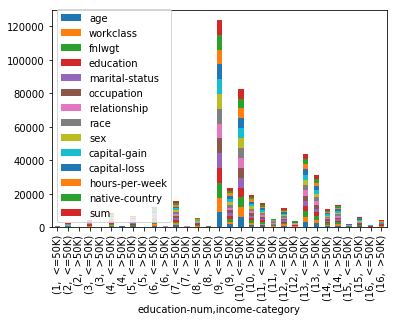

In [20]:
grouped_edu = table.groupby( [ "education-num", "income-category"] )
count = grouped_edu.count()
count.loc[:,"sum"] = count.loc[:,"age"]
count["sum"]
count.plot(kind='bar', stacked=True)


[]

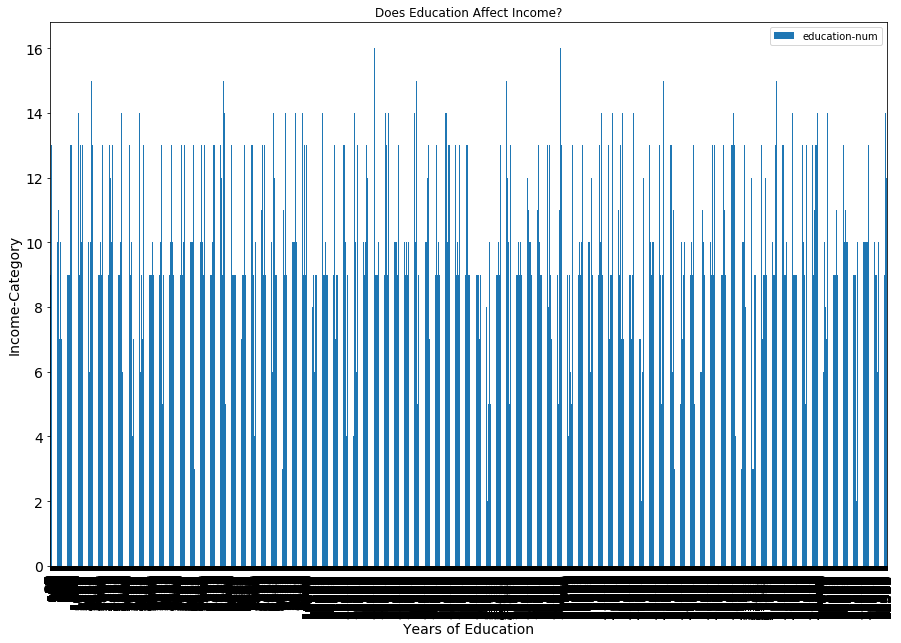

In [31]:
bar = table[['education-num','income-category']].plot(kind='bar', title ="Does Education Affect Income?", figsize=(15, 10), legend=True, fontsize=14)
bar.set_xlabel("Years of Education", fontsize=14)
bar.set_ylabel("Income-Category", fontsize=14)
bar.plot()

In [40]:
newTable = table.loc[:,['education-num', 'income-category']].head()
newTable

,education-num,income-category
0,13,<=50K
1,13,<=50K
2,9,<=50K
3,7,<=50K
4,13,<=50K


In [47]:
pivot_2 = table.pivot_table(index=['education-num', 'education'], values=['fnlwgt'], columns=['sex', 'race'], aggfunc = ('mean'))
pivot_2

fnlwgt                      \
sex                                      Female                       
race                         Amer-Indian-Eskimo  Asian-Pac-Islander   
education-num education                                               
1              Preschool                    NaN       141361.333333   
2              1st-4th            189379.500000        52028.000000   
3              5th-6th                      NaN       103804.222222   
4              7th-8th            134645.000000       100057.500000   
5              9th                 61985.000000       182951.200000   
6              10th                55736.833333       189498.600000   
7              11th                88930.666667       145225.272727   
8              12th                         NaN       184916.500000   
9              HS-grad            121500.972222       134671.658537   
10             Some-college       107202.891892       144539.789474   
11             Assoc-voc          113797.000000       168786.545455   
12             Assoc-acdm         101384.400000       163036.818182   
13             Bachelors          122218.750000       153514.919192   
14             Masters            218355.000000       186735.588235   
15             Prof-school        119359.000000       129396.857143   
16             Doctorate           67300.500000                 NaN   

                                                                          \
sex                                                                        
race                                 Black          Other          White   
education-num education                                                    
1              Preschool     144182.000000            NaN  217925.000000   
2              1st-4th       149708.750000  218046.000000  226197.387097   
3              5th-6th       225956.500000  267781.500000  236402.888889   
4              7th-8th       208402.500000  204522.857143  174527.610169   
5              9th           220214.062500  203327.000000  209727.901961   
6              10th          193475.890625  183981.600000  189204.460465   
7              11th          221393.939024  174089.000000  189882.684848   
8              12th          268384.115385  143993.500000  164049.400000   
9              HS-grad       207622.119508  158345.777778  185997.564275   
10             Some-college  222900.716792  166661.200000  181243.048920   
11             Assoc-voc     205239.632353  145799.666667  186448.644444   
12             Assoc-acdm    182223.103448  186128.333333  180514.281977   
13             Bachelors     222551.151515  149793.000000  179935.315079   
14             Masters       216115.763158  189810.250000  172654.469474   
15             Prof-school    89748.800000            NaN  180474.012658   
16             Doctorate     160611.750000            NaN  195567.012500   

                                                                     \
sex                                        Male                       
race                         Amer-Indian-Eskimo  Asian-Pac-Islander   
education-num education                                               
1              Preschool                    NaN       207650.666667   
2              1st-4th             79067.500000       231933.666667   
3              5th-6th            196563.500000       100218.555556   
4              7th-8th            147475.500000       150017.857143   
5              9th                131695.500000       145259.000000   
6              10th               166967.700000       174552.750000   
7              11th               114636.363636       155657.800000   
8              12th                83977.200000       137213.600000   
9              HS-grad            116975.024096       150327.944444   
10             Some-college       129428.595238       176649.000000   
11             Assoc-voc          151865.000000       130097.148148   
12             Assoc-acdm         

In [54]:
grouping = table.groupby('education')['fnlwgt'].mean()
grouping

education
 10th            196832.465166
 11th            194928.077447
 12th            199097.508083
 1st-4th         239303.000000
 5th-6th         232448.333333
 7th-8th         188079.171827
 9th             202485.066148
 Assoc-acdm      193424.093721
 Assoc-voc       181936.016643
 Bachelors       188055.914846
 Doctorate       186698.760291
 HS-grad         189538.739739
 Masters         179852.362739
 Preschool       235889.372549
 Prof-school     185663.706597
 Some-college    188742.922370
Name: fnlwgt, dtype: float64

In [57]:
table['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [62]:
table.sort_values(by=['education', 'income-category'], ascending=[True, False])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-category
588,52,Private,25826,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,47,United-States,>50K
1395,42,Private,230624,10th,6,Never-married,Transport-moving,Unmarried,White,Male,0,0,40,United-States,>50K
1531,40,Private,85995,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
1533,49,Private,245305,10th,6,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,42,United-States,>50K
3137,51,Private,252903,10th,6,Married-civ-spouse,Sales,Husband,White,Male,0,1977,40,United-States,>50K
3190,39,Private,338320,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K
3983,64,State-gov,550848,10th,6,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
4024,31,Private,381153,10th,6,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
4470,41,Private,197583,10th,6,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,United-States,>50K
4473,64,Private,180401,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,>50K
